**In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand**

In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#Make prediction using ready made model(wthout any training)
IMAGE_SHAPE=(224,224)

classifier_predict=tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE+(3,))
])

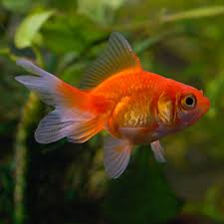

In [3]:
gold_fish=Image.open('/content/goldfish.jpeg').resize(IMAGE_SHAPE)
gold_fish

In [4]:
gold_fish=np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [5]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

In [6]:
result=classifier_predict(gold_fish[np.newaxis, ...])
result.shape

TensorShape([1, 1001])

In [7]:
result

<tf.Tensor: shape=(1, 1001), dtype=float32, numpy=
array([[ 0.21026537,  3.1993704 ,  9.870013  , ..., -1.3661708 ,
        -0.04602805, -0.99987143]], dtype=float32)>

In [8]:
predicted_label_index=np.argmax(result)
predicted_label_index

2

In [9]:
image_labels=[]
with open("/content/ImageNetLabels.txt",'r') as f:
  image_labels=f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [10]:
image_labels[predicted_label_index]

'goldfish'

In [11]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [12]:
data_dir

'./datasets/flower_photos'

In [13]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [14]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/17821459748_873101edd0_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2753166154_0cb51a127b.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8739657154_6db14796c9.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2465573725_d78caca9d4_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4575406391_7a62c5f90f_n.jpg')]

In [15]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [16]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3753920123_c7ebc18ee3.jpg'),
 PosixPath('datasets/flower_photos/roses/6570546331_ffb9dab0bf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4279989256_9a48c0d194_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4243078361_7b92a932cd_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2491600761_7e9d6776e8_m.jpg')]

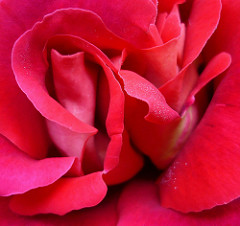

In [17]:
Image.open(str(roses[4]))

In [18]:
tulips=list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/12024561754_ce9667e4dc_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/7481215720_73e40f178f_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/2834890466_1cf220fba1.jpg'),
 PosixPath('datasets/flower_photos/tulips/12764617214_12211c6a0c_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/113291410_1bdc718ed8_n.jpg')]

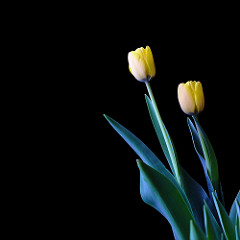

In [19]:
Image.open(str(tulips[3]))

In [20]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [21]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [22]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3753920123_c7ebc18ee3.jpg'),
 PosixPath('datasets/flower_photos/roses/6570546331_ffb9dab0bf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4279989256_9a48c0d194_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4243078361_7b92a932cd_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2491600761_7e9d6776e8_m.jpg')]

In [23]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/3753920123_c7ebc18ee3.jpg'

In [24]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [25]:
img.shape

(363, 500, 3)

In [26]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [27]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [28]:
X = np.array(X)
y = np.array(y)

In [29]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:
#Preprocessing Scale Images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [31]:
X[0].shape

(224, 224, 3)

In [32]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [33]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

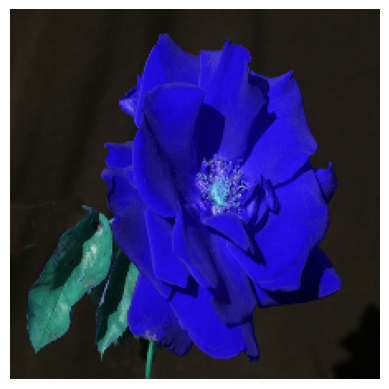

In [34]:
plt.axis('off')
plt.imshow(X[0])

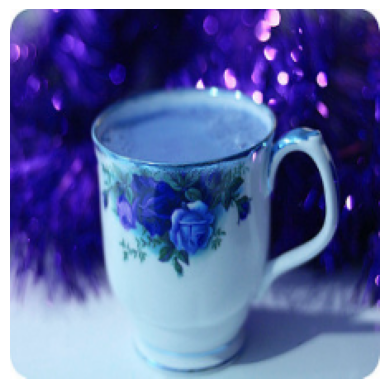

In [35]:
plt.axis('off')
plt.imshow(X[1])

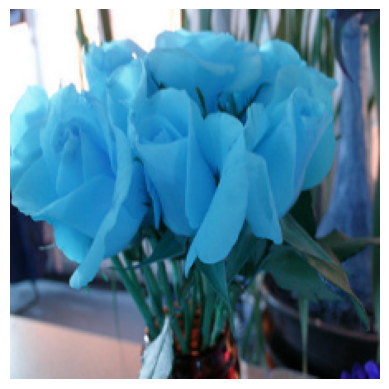

In [36]:

plt.axis('off')
plt.imshow(X[2])

In [37]:
predicted = classifier_predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 722, 795])

In [38]:
#Now take pre-trained model and retrain it using flowers images
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [39]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

In [ ]:
model.evaluate(X_test_scaled,y_test)